## Hyperparamter Tuning + Sk Learn Pipelines
The goals of this notebook is to make Pipelines and this competition easy for you.
___

<a id="1"></a> 
# Description:

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!
___

> **Table of Contents:**
> * [Description of the competiton](#1)
> * [Importing Libraries](#2)
> * [Loading Data](#3)
> * [EDA - Exploratory Data Analysis](#4)
> * [Feature Engineering](#5)
> * [PreProcessing (Transformations)](#6)
> * [ML X Pipelines](#8)
> * [HyperParameter Tunning](#9)
> * [Prediction and Submission](#10)
> ---

<a id="2"></a> 
# 1. Importing Libraries 😀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn import set_config

In [2]:
set_config(display='diagram')

<a id="3"></a> 
# 2- Loading the Data 📅

In [3]:
df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Columns Description**
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<a id="4"></a> 
# 3- Let's Explore 👓

In [4]:
r1,c1 = df_train.shape
print('The training data has {} rows and {} columns'.format(r1,c1))
r2,c2 = df_test.shape
print('The validation data has {} rows and {} columns'.format(r2,c2))

The training data has 8693 rows and 14 columns
The validation data has 4277 rows and 13 columns


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


**Let's look into them**

<a id="5"></a> 
# 4.Feature Engineering 💎

In [8]:
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)

In [9]:
df_train['total_spent']= df_train['RoomService']+ df_train['FoodCourt']+ df_train['ShoppingMall']+ df_train['Spa']+ df_train['VRDeck']
df_test['total_spent']=df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck']

In [10]:
df_train['AgeGroup'] = 0
for i in range(6):
    df_train.loc[(df_train.Age >= 10*i) & (df_train.Age < 10*(i + 1)), 'AgeGroup'] = i
# Same for test data
df_test['AgeGroup'] = 0
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeGroup'] = i

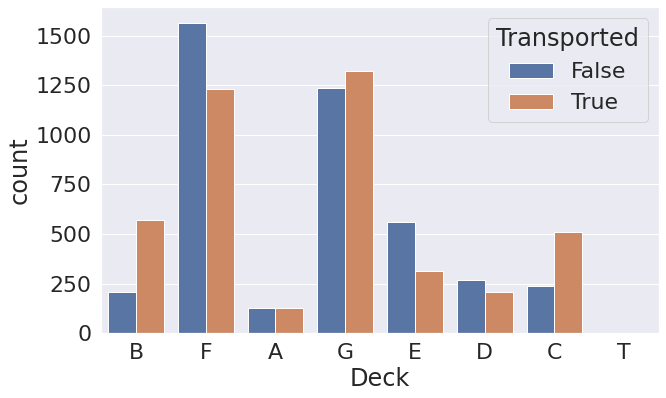

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df_train.Deck,hue=df_train.Transported);

In [12]:
df_train['Num'].nunique()

1817

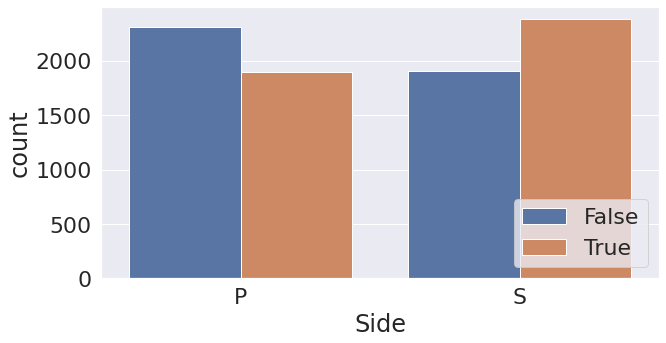

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df_train.Side,hue=df_train.Transported)
plt.legend(loc=4);

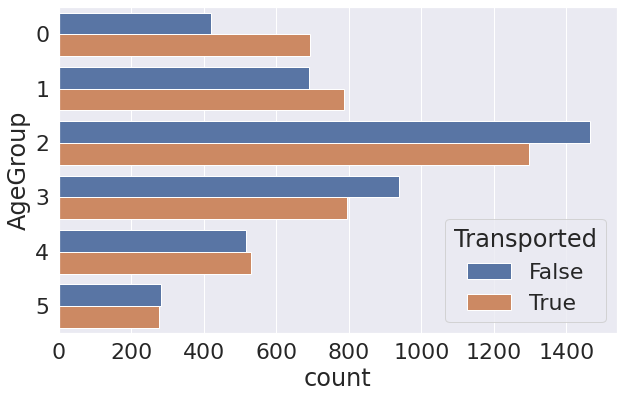

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(y=df_train['AgeGroup'],hue=df_train['Transported']);

<a id="6"></a> 
# 5. Preprocessing 🤖 (Transformations)

In [15]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0,3
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0,5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0,1


In [16]:
X=df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [17]:
X['Num'] = pd.to_numeric(X['Num'])

In [18]:
X=X.drop(['PassengerId','Name'],axis=1)

## 5.B. Seperating Categorical and Numerical Columns

In [19]:
cat_cols=X.select_dtypes('object').columns.to_list()
cat_cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Deck', 'Side']

In [20]:
num_cols=X.select_dtypes(exclude='object').columns.to_list()
num_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Num',
 'total_spent',
 'AgeGroup']

<a id="7"></a> 
# 5.C.Making Seperate Preprocessing Pipelines for numeric and categorical columns.

In [21]:
numeric_preprocessor = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaling',StandardScaler()),
])

In [22]:
categorical_preprocessor = Pipeline(steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore')),  
    ('imputer',SimpleImputer(strategy='constant')),
    
])

### Using Column Transfer to Transform numerical and categorical columns

In [23]:
preprocessor = ColumnTransformer([
    ('categorical',categorical_preprocessor,cat_cols),
    ('numeric',numeric_preprocessor,num_cols)

])

<a id="8"></a> 
# 6. Pipeline TIME!!!😎

## Adding the preprocessor and model in the Pipeline

In [24]:
Pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',GradientBoostingClassifier())])

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [26]:
Pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP', 'Deck', 'Side']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck', 'Num',
                                                   'total_spent',
                                                   'AgeGroup'])])),
                ('model', GradientBoostingClassifier())])

In [27]:
pred=Pipe.predict(X_val)

In [28]:
pred=Pipe.predict(X_train)
pred_y=Pipe.predict(X_val)
print('Train accuracy ',accuracy_score(y_train.values,pred))
print('Validation accuracy',accuracy_score(y_val.values,pred_y))

Train accuracy  0.8186838472158307
Validation accuracy 0.8160073597056118


<a id="9"></a> 
# 7. Using Hyperparameter Tuning 🌠

**Add 'model__' to the original hyperparameter name in the parameter grid. We are using 'model__' because in pipelines we refered GBC as 'model'**

In [29]:
# you can try more parameters, but hell it takes a lot of time.
param_grid={'model__n_estimators':[500,1000],'model__learning_rate':[0.1,0.2],'model__verbose':[1],'model__max_depth':[2,3]}
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(Pipe,param_grid=param_grid,cv=5,scoring="roc_auc")


In [30]:
gcv.fit(X,y)

      Iter       Train Loss   Remaining Time 
         1           1.3347            8.57s
         2           1.2917            8.20s
         3           1.2562            8.10s
         4           1.2260            7.98s
         5           1.2001            7.97s
         6           1.1773            7.94s
         7           1.1579            7.89s
         8           1.1410            7.83s
         9           1.1263            7.79s
        10           1.1128            7.76s
        20           1.0116            7.41s
        30           0.9616            7.20s
        40           0.9256            7.01s
        50           0.9002            6.83s
        60           0.8781            6.66s
        70           0.8601            6.48s
        80           0.8445            6.32s
        90           0.8339            6.14s
       100           0.8232            5.98s
       200           0.7687            4.38s
       300           0.7427            2.86s
       40

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore')),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='constant'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Cabin',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Deck',
                                                                          'Side']),
                                                                        ('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'Num',
                                                                          'total_spent',
                                                                          'AgeGroup'])])),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.1, 0.2],
                         'model__max_depth': [2, 3],
                         'model__n_estimators': [500, 1000],
                         'model__verbose': [1]},
             scoring='roc_auc')

In [31]:
params = gcv.best_params_
params

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 1000,
 'model__verbose': 1}

In [32]:
gcv.best_score_

0.8880872282931171

In [33]:
Hyper_Pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',GradientBoostingClassifier(n_estimators=500,max_depth=3, random_state=1)),
])
Hyper_Pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP', 'Deck', 'Side']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck', 'Num',
                                                   'total_spent',
                                                   'AgeGroup'])])),
                ('model',
                 GradientBoostingClassifier(n_estimators=500, random_state=1))])

In [34]:
pred=Hyper_Pipe.predict(X_train)
pred_y=Hyper_Pipe.predict(X_val)
print('Train accuracy ',accuracy_score(y_train.values,pred))
print('Validation accuracy',accuracy_score(y_val.values,pred_y))

Train accuracy  0.8292682926829268
Validation accuracy 0.8192272309107635


In [35]:
confusion_matrix(pred_y,y_val.values)

array([[847, 182],
       [211, 934]])

<a id="10"></a> 
# 8. Prediction and Submission 😎

In [36]:
y_pred = Hyper_Pipe.predict(df_test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test['PassengerId'])

sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True


In [37]:
sub.to_csv('submission')

In [38]:
pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


### <center>Thanks for reading:)</center>
### <center>Upvote! and Leave some suggestions</center>
